`Ancila qubit` - dodatkowy kubit, który jest używany do przechowywania informacji tymczasowej. Jest to kubit, który nie jest używany do przechowywania informacji o wyniku obliczeń. 



`Measurements` - służą do pomiaru stanu kubitów. W Qiskit, pomiary są zawsze wykonywane na końcu obwodu. Wyniki pomiarów są zwracane w postaci klasycznych bitów.

Tutaj dodac obrazek z wyjasnieniem co to achila qubit.
Data qubits (nie zmieniaja się w trakcie wykonywania obwodu)+ target qubit (realizuje dodawanie modulo 2 do data qubit) - XOR bramka. 

Reprezentacja bramek klasyczych w odwracalny sposób. Nickiel tutorial 2. 

## Create logical gates with the help of quantum gates

### NOT gate

The NOT gate flips the value of a bit and, as was mentioned before, an X gate can be considered a NOT gate. The truth table for a NOT gate looks like this:

| Input | Output |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

In [ ]:
not_gate=QuantumCircuit(1,1) # Create a quantum circuit with 1 qubit and 1 classical bit
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl')

### AND gate

The output of an AND is true if and only if both inputs are true. The truth table for an AND Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

With a Toffoli gate, we can get the result of an AND gate by interpreting the two control bits as the input bits and the target bit as the output bit.

In [ ]:
and_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

### OR gate

An OR gate returns true if at least one of the input gates is true.
The truth table for an OR Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

In [ ]:
or_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')

### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. 

Note: Qiskit numbers the bits in a string from right to left.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

In [ ]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

In [6]:

#mpl.rcParams['figure.dpi']= 200

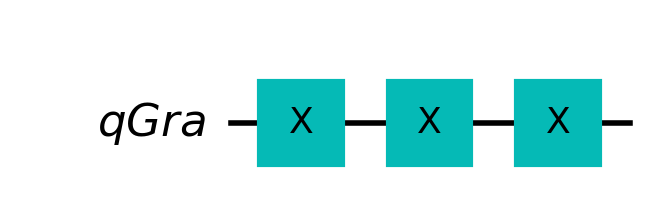

In [7]:
def obwod(strategia):
    qc = QuantumCircuit(QuantumRegister(1, name='qGra'))
    for bramka in strategia:
        if bramka == 'I':
            qc.id(0)
        elif bramka == 'H':
            qc.h(0)
        elif bramka == 'X':
            qc.x(0)
    return qc

strategia = 'XXX'
obwod(strategia).draw('mpl')

In [10]:
%matplotlib inline
def animacja(strategia):
    qc = QuantumCircuit(QuantumRegister(1, name="q0"))
    symulator = Aer.get_backend('statevector_simulator')
    wynik = execute(qc, backend=symulator).result()
    stan = wynik.get_statevector()
    print(stan)
    print("stan poczatkowy:")
    plot_bloch_multivector(stan)
    plt.show()
    for it, bramka in enumerate(strategia):
        if bramka == 'I':
            qc.id(0)
        elif bramka == 'H':
            qc.h(0)
        elif bramka == 'X':
            qc.x(0)
        wynik = execute(qc, backend=symulator).result()
        stan = wynik.get_statevector()
        print("stan po bramce", bramka)
        plot_bloch_multivector(stan)
        plt.show()

animacja(strategia)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
stan poczatkowy:
stan po bramce X
stan po bramce X
stan po bramce X


In [11]:
def sedzia(obwod):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    ob = QuantumCircuit(qr, cr)
    ob.append(obwod, qr)
    ob.measure(0, 0)
    symulator = Aer.get_backend('qasm_simulator')
    return  execute(ob, backend=symulator, shots=1000).result()


In [13]:
strategia = 'XXX'
stats = sedzia(obwod(strategia)).get_counts()
print(stats)

{'1': 1000}


In [14]:
strategia = 'HXH'
stats = sedzia(obwod(strategia)).get_counts()
print(stats)

{'0': 1000}


In [18]:
def klasycze_strategie():
    wyniki = []
    for ruch_1 in ['I','X']:
        for ruch_2 in ['I','X']:
            for ruch_3 in ['I','X']:
                strategia = ruch_1 + ruch_2 + ruch_3
                print("strategia",strategia)
                ob = obwod(strategia)
                ob.draw('mpl')
                plt.show()
                stats = sedzia(ob).get_counts()
                print("statystyka", stats)
                wyniki.append((strategia, stats))

In [19]:
klasycze_strategie()

strategia III
statystyka {'0': 1000}
strategia IIX
statystyka {'1': 1000}
strategia IXI
statystyka {'1': 1000}
strategia IXX
statystyka {'0': 1000}
strategia XII
statystyka {'1': 1000}
strategia XIX
statystyka {'0': 1000}
strategia XXI
statystyka {'0': 1000}
strategia XXX
statystyka {'1': 1000}


In [ ]:
napisz sprawdzenie gdy ruch 1 i 3 to H